In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [12]:
len(x_train)

24

In [13]:
len(x_test)

6

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)


LinearRegression()

In [20]:
model.predict(x_test)

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [21]:
model.predict([[1.5]])

array([40124.39112273])

In [25]:
predict = model.predict(x_test)
predict

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [31]:
df1 = pd.DataFrame()

In [35]:
df1['Actual value']=y_test
df1['Predicted value']=predict
df1['Error'] = df1['Predicted value'] - df1['Actual value']
df1

,Actual value,Predicted value,Error
0,91738.0,89715.764988,-2022.235012
1,54445.0,56031.058212,1586.058212
2,56642.0,53223.999314,-3418.000686
3,37731.0,40124.391123,2393.391123
4,43525.0,44802.822619,1277.822619
5,98273.0,92522.823887,-5750.176113


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
print("R2 Score", r2_score(predict, y_test))

R2 Score 0.9772735206341413


In [39]:
print("ABME", mean_absolute_error(predict, y_test))

ABME 2741.2806275420785


In [41]:
print("RMSE", mean_squared_error(predict, y_test))

RMSE 9785570.138914311


In [42]:
print("MSE", np.sqrt(mean_squared_error(predict, y_test)))

MSE 3128.1895944642342


# Adjusted R2 Square

In [45]:
r2 = r2_score(predict, y_test)
n = len(y_test)
k = 1
adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
print('Adjusted r2', adj_r2)


Adjusted r2 0.9715919007926767


In [46]:
print('Coefficient', model.coef_)
print('Intercept', model.intercept_)

Coefficient [9356.86299354]
Intercept 26089.096632416702


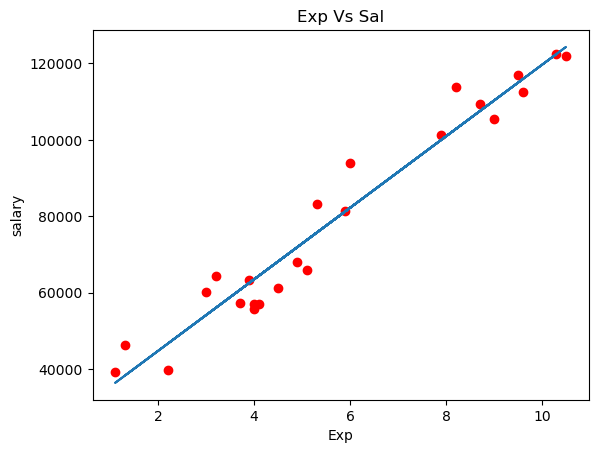

In [51]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))
plt.title('Exp Vs Sal')
plt.xlabel('Exp')
plt.ylabel('salary')
plt.show()

In [52]:
import statsmodels.api as sml

In [54]:
regressor  = sml.OLS(x,y).fit()

In [55]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Fri, 12 May 2023   Prob (F-statistic):                    2.56e-24
Time:                        02:19:42   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.341e-05   2.27e-06     32.376      0.000    6.88e-05    7.81e-05
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.709
Skew:                           0.152   Prob(JB):                        0.701
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""